# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

In [3]:
group = "adults"

## Abriendo csv's

In [4]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [5]:
char_csv=pd.read_csv(characterization_path/'29-jul-2021'/f'curvelet_abide_{group}_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'29-jul-2021'/f'curvelet_abide_{group}_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [6]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [7]:
discarded_quality_b = pd.read_csv(Path(base_path)/'discarded_subjects_quality'/'ABIDE_CHECK_VISUAL - Quality ABIDE.csv')
discarded_quality_b["SUBJECT_ID"] = [int(center.split("_")[-1]) for center in discarded_quality_b["CENTER"].values]
discarded_quality_b.head()

,CENTER,GROUP,DX_GROUP,SUBJECT_ID
0,KKI_50815,CHILDREN,1,50815
1,MaxMun_51352,CHILDREN,1,51352
2,MaxMun_51353,CHILDREN,1,51353
3,Olin_50122,CHILDREN,1,50122
4,Olin_50133,CHILDREN,1,50133


In [8]:
phen_csv[phen_csv['SUB_ID'].isin(discarded_quality_b['SUBJECT_ID'].values)]

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
154,28764,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.608219,2.0,3.0
162,28782,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.016438,1.0,3.0
171,28799,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,8.931507,1.0,1.0
173,28802,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.304110,1.0,2.0
181,28816,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.621918,1.0,2.0
183,28818,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.624658,1.0,1.0
188,28823,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.183562,1.0,1.0
227,28781,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.687671,1.0,0.0
233,28794,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.468493,2.0,0.0
290,29599,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,10.150000,1.0,0.0


In [9]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1.0,Precentral_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.280378,0.431012,2.901892,...,-1.117101e-03,0.011483,0.533973,9.994292e-21,0.010848,0.579681,-0.000945,0.007731,0.565111,-2.848351e-09
1,2.0,Precentral_R,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.095042,0.375989,2.044576,...,-3.344609e-19,0.003249,0.422430,1.598011e-19,0.003047,0.432332,0.000026,0.002413,0.442074,6.094904e-11
2,3.0,Frontal_Sup_2_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,1.462835,0.698372,2.914674,...,-6.725184e-19,0.010238,0.571828,-2.341088e-19,0.009431,0.585593,0.000140,0.006013,0.553724,-7.340221e-10
3,4.0,Frontal_Sup_2_R,29007.0,1.0,ABIDE-II,BNI_1,41.0,1.182095,0.669742,2.630404,...,2.190744e-03,0.006257,0.511471,-1.882490e-19,0.005226,0.518705,-0.000045,0.004921,0.546829,-1.981058e-10
4,5.0,Frontal_Mid_2_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.466163,0.550041,2.116103,...,6.780509e-04,0.003921,0.480043,1.235365e-19,0.002956,0.473218,0.000540,0.002093,0.458618,3.978835e-10


In [10]:
display(char_csv.query('region_name=="Amygdala_L"'))

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
42,45.0,Amygdala_L,29007.0,1.0,ABIDE-II,BNI_1,41.0000,9.658339,17.784198,3.384158,...,7.257070e-03,0.081281,1.113109,1.435633e-19,0.060022,1.075152,-0.000074,0.065466,1.188380,-1.039310e-10
208,45.0,Amygdala_L,29028.0,1.0,ABIDE-II,BNI_1,21.0000,7.654780,1.897425,4.013029,...,-1.524924e-17,0.110823,1.123848,-1.541976e-18,0.089653,1.290724,-0.001084,0.072531,1.178946,6.349315e-19
374,45.0,Amygdala_L,29029.0,1.0,ABIDE-II,BNI_1,20.0000,7.744283,1.948592,3.912500,...,1.367370e-17,0.151229,1.337695,2.040851e-18,0.103874,1.301127,0.002137,0.082020,1.324139,1.974463e-06
540,45.0,Amygdala_L,29031.0,1.0,ABIDE-II,BNI_1,21.0000,10.326128,4.887253,4.010467,...,-8.896653e-18,0.073830,1.052502,1.565164e-19,0.055438,0.966431,-0.000054,0.062386,1.230125,6.189747e-05
706,45.0,Amygdala_L,29037.0,1.0,ABIDE-II,BNI_1,19.0000,9.607304,5.248092,3.703506,...,2.960260e-02,0.087096,1.150085,-1.100652e-18,0.068365,1.087707,0.004018,0.075464,1.257930,-1.927124e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73580,45.0,Amygdala_L,50508.0,1.0,ABIDE-I,USM,26.3792,7.035552,1.967393,3.694149,...,3.779656e-18,0.106574,1.167526,-9.868649e-19,0.082882,1.265778,0.002779,0.070910,1.215285,-5.442270e-19
73746,45.0,Amygdala_L,50514.0,1.0,ABIDE-I,USM,21.4018,6.989252,2.069888,3.430562,...,-3.945646e-18,0.108308,1.087932,6.802837e-19,0.089301,1.246855,-0.005334,0.083894,1.280565,-1.655407e-06
73912,45.0,Amygdala_L,50525.0,1.0,ABIDE-I,USM,32.8487,9.455742,7.599316,3.446160,...,-8.785910e-19,0.082529,0.982750,3.554227e-19,0.069971,1.062050,-0.006119,0.076197,1.172508,2.232974e-06
74078,45.0,Amygdala_L,50529.0,1.0,ABIDE-I,USM,42.3354,9.024040,6.517857,3.590482,...,1.690243e-18,0.154908,1.627136,-4.966943e-19,0.104424,1.318690,0.003038,0.085458,1.461618,-2.217072e-07


In [11]:
def filter_bad_1(bad_str):
    s = bad_str.split('characterization issue on region')
    if len(s)>1:
        return int(s[1])
    else:
        return 54

In [12]:
bad_log_csv['region_issue'] = [filter_bad_1(stri) for stri in bad_log_csv['bad_log_cell1'].values]

In [13]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
0,characterization issue on region 113,29007,BNI_1,ABIDE-II,113
1,characterization issue on region 121,29007,BNI_1,ABIDE-II,121
2,characterization issue on region 122,29007,BNI_1,ABIDE-II,122
3,characterization issue on region 123,29007,BNI_1,ABIDE-II,123
4,characterization issue on region 124,29007,BNI_1,ABIDE-II,124
...,...,...,...,...,...
12131,characterization issue on region 165,50531,USM,ABIDE-I,165
12132,characterization issue on region 167,50531,USM,ABIDE-I,167
12133,characterization issue on region 168,50531,USM,ABIDE-I,168
12134,characterization issue on region 169,50531,USM,ABIDE-I,169


In [14]:
int_regions = [45,46,4,6,20,37, 153, 155,3, 5, 19,15,38, 154, 156,68,21,23,22,24,65,69,85,60]
bad_log_final = bad_log_csv[bad_log_csv['region_issue'].isin(int_regions)]
display(bad_log_final.head())

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue


In [15]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_final['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

region_list=['Amygdala_L', 'Amygdala_R', 'Frontal_Sup_2_R', 'Frontal_Mid_2_R', 'Frontal_Sup_Medial_R',
            'Cingulate_Mid_L', 'ACC_pre_L', 'ACC_sup_L', 'Frontal_Sup_2_L', 'Frontal_Mid_2_L', 'Frontal_Sup_Medial_L',
            'Supp_Motor_Area_L', 'Cingulate_Mid_R', 'ACC_pre_R', 'ACC_sup_R', 'SupraMarginal_R', 'Frontal_Med_Orb_L', 
             'Rectus_L', 'Frontal_Med_Orb_R', 'Rectus_R', 'Parietal_Inf_L', 'Angular_L', 'Temporal_Sup_L', 'Fusiform_R']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

region_idx=int_regions
print('len region list: ', len(region_list))  
print('len region idx: ', len(region_idx)) 

#region_list=['left frontal medial cortex']
#region_idx=[49]

[50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353, 50815, 51352, 51353, 50122, 50133, 50136, 51213, 51296, 51312, 51314, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50313, 50317, 50322, 50323, 50327, 50328, 50371, 50618, 28764, 28781, 28782, 28794, 28799, 28802, 28816, 28818, 28823, 29599, 29398, 29102, 29741, 29742, 29751]


,region
index,
1.0,Precentral_L
2.0,Precentral_R
3.0,Frontal_Sup_2_L
4.0,Frontal_Sup_2_R
5.0,Frontal_Mid_2_L
6.0,Frontal_Mid_2_R
7.0,Frontal_Inf_Oper_L
8.0,Frontal_Inf_Oper_R
9.0,Frontal_Inf_Tri_L


len region list:  24
len region idx:  24


In [16]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [17]:
colors=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff']]

colors=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#d5a18e', '#dec3be'],
        ['#13505b', '#040404'],
        ['#e26d5c','#723d46'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9']]

In [18]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [19]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [20]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [21]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1296
326
(326, 261)
{'ASD': 159, 'CONTROL': 167}
{'ASD': 159, 'CONTROL': 167}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,54.0,Occipital_Sup_R,29588.0,1.0,ABIDE-II,IP_1,19.7100,0.328214,0.452136,2.618453,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,19.7100,1.0
1,54.0,Occipital_Sup_R,29595.0,1.0,ABIDE-II,IP_1,27.3600,0.261344,0.434831,2.521372,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,27.3600,1.0
2,54.0,Occipital_Sup_R,29627.0,1.0,ABIDE-II,IP_1,21.1200,0.016423,0.292231,2.264332,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,21.1200,1.0
3,54.0,Occipital_Sup_R,29580.0,2.0,ABIDE-II,IP_1,24.2600,0.065852,0.349949,2.219535,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,24.2600,0.0
4,54.0,Occipital_Sup_R,29583.0,2.0,ABIDE-II,IP_1,22.4600,0.110510,0.376702,2.324220,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,22.4600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,54.0,Occipital_Sup_R,50508.0,1.0,ABIDE-I,USM,26.3792,0.172133,0.393418,2.698975,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,26.3792,1.0
322,54.0,Occipital_Sup_R,50514.0,1.0,ABIDE-I,USM,21.4018,0.084041,0.352988,2.737698,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,21.4018,1.0
323,54.0,Occipital_Sup_R,50525.0,1.0,ABIDE-I,USM,32.8487,0.064238,0.346523,2.287282,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,32.8487,1.0
324,54.0,Occipital_Sup_R,50529.0,1.0,ABIDE-I,USM,42.3354,0.006800,0.270010,1.862805,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,42.3354,1.0


datos de ASD: mean: -0.033394596106349206  std: 1.034567559570425
datos de Control: mean: 0.03179485497550787  std: 0.9648659901922043


(array([ 1.,  0.,  0.,  3.,  1.,  6.,  4.,  7.,  7.,  8., 12., 10.,  6.,
        10., 13., 12., 13.,  7., 12.,  4.,  9.,  4.,  4.,  2.,  2.,  2.,
         4.,  1.,  1.,  2.]),
 array([-2.40320292, -2.2375675 , -2.07193208, -1.90629666, -1.74066125,
        -1.57502583, -1.40939041, -1.24375499, -1.07811957, -0.91248416,
        -0.74684874, -0.58121332, -0.4155779 , -0.24994249, -0.08430707,
         0.08132835,  0.24696377,  0.41259918,  0.5782346 ,  0.74387002,
         0.90950544,  1.07514086,  1.24077627,  1.40641169,  1.57204711,
         1.73768253,  1.90331794,  2.06895336,  2.23458878,  2.4002242 ,
         2.56585961]),
 <BarContainer object of 30 artists>)

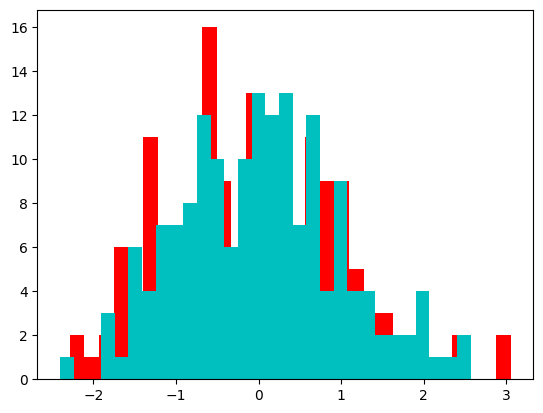

In [22]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==54]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in discard_q_csv['ID'].values:
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

print(len(np.unique(features_merge['subject_id'])))

#print('adultos: ', len(phen_csv.query('EDAD>=19')))
#print('adultos ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
#print('adultos control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv(f'{group}_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [23]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1', 'ONRC_2',
       'TCD_1', 'USM_1', 'Caltech', 'CMU', 'Leuven', 'MaxMun', 'NYU',
       'Olin', 'Pitt', 'SBL', 'Trinity', 'UM', 'USM'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [24]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [25]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [26]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [27]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [28]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [29]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

In [30]:
#map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [31]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx].dropna()
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    print(features_merge)
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+f'/results_{group}/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+f'/results_{group}/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+f'/results_{group}/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+f'/results_{group}/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+f'/results_{group}/'+region_name):
        os.makedirs(os.getcwd()+f'/results_{group}/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+f'/results_{group}/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

Amygdala_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            45.0  Amygdala_L     29588.0       1.0  ABIDE-II    IP_1   
1            45.0  Amygdala_L     29595.0       1.0  ABIDE-II    IP_1   
2            45.0  Amygdala_L     29627.0       1.0  ABIDE-II    IP_1   
3            45.0  Amygdala_L     29580.0       2.0  ABIDE-II    IP_1   
4            45.0  Amygdala_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          45.0  Amygdala_L     50508.0       1.0   ABIDE-I     USM   
322          45.0  Amygdala_L     50514.0       1.0   ABIDE-I     USM   
323          45.0  Amygdala_L     50525.0       1.0   ABIDE-I     USM   
324          45.0  Amygdala_L     50529.0       1.0   ABIDE-I     USM   
325          45.0  Amygdala_L     50531.0       1.0   ABIDE-I     USM   

         age     curv_1     curv_2    curv_3  ...  SITE_ID   DATASET  \
0    19.7100   9.930820   8.258784  4.46

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:33<00:00,  7.24it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.37190312026245703
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.46580520150352517
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.049295881656837695
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4203384292080684
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3330722110037573
caracteristica numero: 6
sub-banda: 2
t-test: 0.31576572657581103
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11800757411754909
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1537642597304466
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.07727349906311172
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.01417186028286337
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0074526947241723785
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.07727349906311172
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13203544350581203
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.014299543984868462
caracteristica numero: 15
sub-banda: 5
wilco

caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1463624088093028
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.4770318527724092
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.03399103749934382
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.48265258341372336
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.28268998504704823
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.1561446749252512
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.24212524214888376
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.1405110493623395
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.2130503468161274
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.3275355932878699
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.11524199989607775
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.0008496573261194706
quartiles
[1, 2]
[-3.450063546525078e-18, 4.231532313114212e-18]
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.22449885665821906
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.3216152398285127
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.3433890948808681
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.17682073132296794
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.2154499475518727
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.2623881640450413
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3088746619932472
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.498593012078501
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.259332397520289
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.15182187982589812
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.028195580196244
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.14103633382610908
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.11987717672476955
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.203941988666411
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.472819240107988
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Amygdala_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            46.0  Amygdala_R     29588.0       1.0  ABIDE-II    IP_1   
1            46.0  Amygdala_R     29595.0       1.0  ABIDE-II    IP_1   
2            46.0  Amygdala_R     29627.0       1.0  ABIDE-II    IP_1   
3            46.0  Amygdala_R     29580.0       2.0  ABIDE-II    IP_1   
4            46.0  Amygdala_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          46.0  Amygdala_R     50508.0       1.0   ABIDE-I     USM   
322          46.0  Amygdala_R     50514.0       1.0   ABIDE-I     USM   
323          46.0  Amygdala_R     50525.0       1.0   ABIDE-I     USM   
324          46.0  Amygdala_R     50529.0       1.0   ABIDE-I     USM   
325          46.0  Amygdala_R     50531.0       1.0   ABIDE-I     USM   

         age     curv_1     curv_2    curv_3  ...  SITE_ID   DATASET  \
0    19.7100  11.959766  62.399077  6.56

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.94it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.001597079483835798
quartiles
[1, 2]
[-0.752486714335358, 0.847080684495609]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4411217732051431
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.008614882717437171
quartiles
[1, 2]
[-0.7210904684767114, 0.5677747313971996]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.40113784941751995
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.17348549562068827
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4746895433561849
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2154499475518727
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.01605144581721331
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.10273465296524043
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3889164554594757
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.33907565316288757
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.10273465296524043
caracteristica numero: 13
sub-banda: 5
t-test: 0.867145264016285
ca

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.13351602970676646
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.26315497645847424
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.28707937607668754
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.48265258341372336
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.41666503334516797
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.17228267521117674
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.48265258341372336
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.4420496936878308
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.04435235891953386
caracteristica numero: 39
sub-banda: 13
t-test: 0.05561038652119947
caracteristica numero: 40
sub-banda: 14
t-test: 0.11893357118823386
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.0012732197622148341
quartiles
[1, 2]
[-0.06708912572421263, -0.04974024830332293]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.6526626434841492
caracteristica numero: 43
sub-banda: 15
t-test: 0.36432760152502175
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.2540293957291584
caracteristica numero: 45
sub-banda: 15
t-test: 0.46512257111145494
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.24803921777555604
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.37993318932394504
caracteristica numero: 48
sub-banda: 16
t-test: 0.4651225711114554
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.4709479150738612
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.16517785748837593
caracteristica numero: 51
sub-banda: 17
t-test: 0.5672301266981059
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.1950697699482536
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.48968321735895537
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.0015024651144272475
quartiles
[1, 2]
[-0.20699659885408012, 0.17044679356790804]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 55
sub-banda: 19
t-test: 0.07398739209662873
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.03475212418931126
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.37457381940500656
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.08449549627881564
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.2443339819862877
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.2397430546597421
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.00445207821034015
quartiles
[1, 2]
[-0.8157434375649075, 0.8408906940367792]
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0037159671265946906


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7590004442962929, 0.7035920529763215]
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.01558574427577636
caracteristica numero: 64
sub-banda: 22
t-test: 0.053719541891216006
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.008670037049318685
quartiles
[1, 2]
[-0.6915368913537008, 0.534853504879834]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.01558574427577636
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.2002987174185547
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.14209089378251444
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.010788425460404325
quartiles
[2, 1]
[-3.4333874154440762e-18, 2.8186597788509686e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.26315497645847424
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.24618286173054083
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.04671430253620148
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.03154014199369388
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.016578005495207958
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.43903449689129315
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.22981597478122562
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.20161899565152597
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.4957790576273563
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.05965558975505379
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.10002570752050949
caracteristica numero: 81
sub-banda: 27
t-test: 0.4993854980276181
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.021891847265074326
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.18833408319995926
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.14921057759712397
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.1839243544941906
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.3701260632384785
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.38486579008549726
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.015221377688178168
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.00636743989353137
quartiles
[1, 2]
[-0.6446951748512898, 0.5404068311139979]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.8112829886977295
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.305363763167284
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.265077003748928
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.25497094240243257
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.21407683248422948
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.4639364932031494
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.41116865382101064
caracteristica numero: 112
sub-banda: 38
t-test: 0.9790175829601941
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.43741337252016876
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.41116865382101064
caracteristica numero: 115
sub-banda: 39
t-test: 0.038273082460640644
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.02283006433933993
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.4194186180398067
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.13609976890283265
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.050019373914350754
caracteristica numero: 132
sub-banda: 44
t-test: 0.2115637085361001
caracteristica numero: 133
sub-banda: 45
t-test: 0.24521842776542258
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.35996277090014794
caracteristica numero: 135
sub-banda: 45
t-test: 0.9927045926424714
caracteristica numero: 136
sub-banda: 46
t-test: 0.06442629834976057
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.3674656789021654
caracteristica numero: 138
sub-banda: 46
t-test: 0.992704592642472
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.0016153969919251367
quartiles
[1, 2]
[-0.7894260072930915, 0.969031377980152]
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.12153012740577496
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.3734588703491638
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.07425511991394644
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.3254160993251256
caracteristica numero: 144
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.6890221274384156, 0.683716078255785]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.03594254705038479
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.03548079776265838
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.4732871482648275
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.01383616234380481
caracteristica numero: 158
sub-banda: 53
t-test: 0.04235781166500086
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.4971860416574685
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.009964285490301471
quartiles
[1, 2]
[-0.9631437583409842, 0.8109630884459065]
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.012146876321963783
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.8943523547946794, 0.6468440702654363]
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.4971860416574685
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.06958271104491277
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0908591998922561
caracteristica numero: 165
sub-banda: 55
t-test: 0.4234283363325403
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.03754944398724152
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.05440997374644349
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.15460172201391265
caracteristica numero: 169
sub-banda: 57
t-test: 0.028595270629010152
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.08073558000097464
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.351640646376344
caracteristica numero: 172
sub-banda: 58
t-test: 0.017747634099779825
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.06573938169716677
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.08064755110503002
caracteristica numero: 175
sub-banda:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.036128619832211765
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.3979595099537167
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.06958271104491277
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.07326926126340146
caracteristica numero: 204
sub-banda: 68
t-test: 0.6286012722288237
caracteristica numero: 205
sub-banda: 69
t-test: 0.4110106535725704
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.1808142538111263
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.04363443677787759
caracteristica numero: 208
sub-banda: 70
t-test: 0.11016801815137776
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.04775698110400386
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.04223824929323475
caracteristica numero: 211
sub-banda: 71
t-test: 0.10270084101155512
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.041982148279758956
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.013568399331965695
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.10895922257940666
caracteristica numero: 235
sub-banda: 79
t-test: 0.026839079838286053
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.24618286173054083
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.18722504410861773
caracteristica numero: 238
sub-banda: 80
t-test: 0.060292785814370004
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.24915660584141414
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.25629512290717316
caracteristica numero: 241
sub-banda: 81
t-test: 0.31030000782206835
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.498593012078501
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4063735296722873
Frontal_Sup_2_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             4.0  Frontal_Sup_2_R     29588.0       1.0  ABIDE-II    IP_1   
1             4.0  Frontal_Sup_2_R     29595.0       1.0  ABIDE-II    IP_1   
2             4.0  Frontal_Sup_2_R     29627.0 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.75it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.27675693737664087
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3309383505810565
caracteristica numero: 3
sub-banda: 1
t-test: 0.5772995061785003
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.011076929015482259
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.019325552251286453
caracteristica numero: 6
sub-banda: 2
t-test: 0.1569781176499157
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.02232555039607696
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.01721897093209792
caracteristica numero: 9
sub-banda: 3
t-test: 0.7159627810550095
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.38531571812938614
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.32330223660178964
caracteristica numero: 12
sub-banda: 4
t-test: 0.7159627810550111
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.04625679038329374
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.06664642758605852
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.034

caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.1463624088093028
caracteristica numero: 146
sub-banda: 49
t-test: 0.3981166109838826
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4686096653978512
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.48452698212583867
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.4332479999761837
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.47750008798017846
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.45973486963830495
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.48827676407565446
caracteristica numero: 153
sub-banda: 51
t-test: 0.23814472484419
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.08990167767446794
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.13103257699255344
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.4971860416574685
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.018458002157249433
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.034392421617415916
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.004212793985487628
quartiles
[1, 2]
[-1.6164056070153046, 0.6872097758858946]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3249928744213204
caracteristica numero: 187
sub-banda: 63
t-test: 0.043216216305739436
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.0382279387513097
caracteristica numero: 189
sub-banda: 63
t-test: 0.16840314575540347
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.08304794820626032
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.06106250974848798
caracteristica numero: 192
sub-banda: 64
t-test: 0.6418120037858017
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.281498499938062
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.26124009459911235
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4760954781249744
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.342956820149512
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.30043756416165723
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.3595230662536551
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.4835897374362316
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.007500936162555033
quartiles
[2, 1]
[-0.05476621921263872, 0.3433979570388039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.3174138697322214
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.162563154745823
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.04688590715559583
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.03557274422845292
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.011076929015482259
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.30454024491123577
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.45320811038848685
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.43741337252016876
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.15017001442063388
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.37190312026245703
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.46300243472165836
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.2189050013058222
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.08726053658339122
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.09221241422006282
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


caracteristica numero: 238
sub-banda: 80
t-test: 0.07678929874188933
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.050751308115766496
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.14825803416776584
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.24065878479358999
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.23375959007151825
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.07795673648546016
Frontal_Mid_2_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             6.0  Frontal_Mid_2_R     29588.0       1.0  ABIDE-II    IP_1   
1             6.0  Frontal_Mid_2_R     29595.0       1.0  ABIDE-II    IP_1   
2             6.0  Frontal_Mid_2_R     29627.0       1.0  ABIDE-II    IP_1   
3             6.0  Frontal_Mid_2_R     29580.0       2.0  ABIDE-II    IP_1   
4             6.0  Frontal_Mid_2_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321          

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.64it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.22768071140490131
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21476275239239523
caracteristica numero: 3
sub-banda: 1
t-test: 0.528229902769777
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2178651523444763
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2439651061540794
caracteristica numero: 6
sub-banda: 2
t-test: 0.9490558223701411
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4943722233147508
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3254160993251256
caracteristica numero: 9
sub-banda: 3
t-test: 0.36348475375809475
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.35996277090014794
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.48265258341372336
caracteristica numero: 12
sub-banda: 4
t-test: 0.3634847537580922
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4125411596123204
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.42125787654718094
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.346420703

caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.45320811038848685
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.4892143844795552
caracteristica numero: 228
sub-banda: 76
t-test: 0.8827410979792781
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.15154573371042473
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.13253885666113885
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.12283810318902022
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.2551609441655375
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.25743192392826836
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.10984837371599837
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4967170584308073
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.477968354250673
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.08971107646245602
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.24507263456849615
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.2811018773079845
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Sup_Medial_R
     region_index           region_name  subject_id  dx_group   dataset  \
0            20.0  Frontal_Sup_Medial_R     29588.0       1.0  ABIDE-II   
1            20.0  Frontal_Sup_Medial_R     29595.0       1.0  ABIDE-II   
2            20.0  Frontal_Sup_Medial_R     29627.0       1.0  ABIDE-II   
3            20.0  Frontal_Sup_Medial_R     29580.0       2.0  ABIDE-II   
4            20.0  Frontal_Sup_Medial_R     29583.0       2.0  ABIDE-II   
..            ...                   ...         ...       ...       ...   
321          20.0  Frontal_Sup_Medial_R     50508.0       1.0   ABIDE-I   
322          20.0  Frontal_Sup_Medial_R     50514.0       1.0   ABIDE-I   
323          20.0  Frontal_Sup_Medial_R     50525.0       1.0   ABIDE-I   
324          20.0  Frontal_Sup_Medial_R     50529.0       1.0   ABIDE-I   
325          20.0  Frontal_Sup_Medial_R     50531.0       1.0   ABIDE-I   

    site_id      age     curv_1      curv_2    curv_3  ...  SITE_ID   DATASET 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.79it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3516406830880941
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23088779681372157
caracteristica numero: 3
sub-banda: 1
t-test: 0.5630245031261327
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.31032546427318963
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.17743146402564125
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.15840737316896908
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.14609293956992508
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10918869001855996
caracteristica numero: 9
sub-banda: 3
t-test: 0.016931907280716918
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.023214724238359463
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.010805838097200334
caracteristica numero: 12
sub-banda: 4
t-test: 0.016931907280716908
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.17378703385464078
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05014077503493383
caracteristica numero: 15
sub-banda: 5
wilcoxon

caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.10189551201709757
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.08633144807718279
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2469245088910768
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.08933077558536667
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.08322786497320156
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.3343551319423166
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.13279105851346223
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.12034782262595528
caracteristica numero: 180
sub-banda: 60
t-test: 0.025336655453769702
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.017420402453394025
caracteristica numero: 182
sub-banda: 61
t-test: 0.03506868214671077
caracteristica numero: 183
sub-banda: 61
t-test: 0.4308262150064839
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.046599585521302306
caracteristica numero: 185
sub-banda: 62
t-test: 0.08281396098448633
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Cingulate_Mid_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            37.0  Cingulate_Mid_L     29588.0       1.0  ABIDE-II    IP_1   
1            37.0  Cingulate_Mid_L     29595.0       1.0  ABIDE-II    IP_1   
2            37.0  Cingulate_Mid_L     29627.0       1.0  ABIDE-II    IP_1   
3            37.0  Cingulate_Mid_L     29580.0       2.0  ABIDE-II    IP_1   
4            37.0  Cingulate_Mid_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321          37.0  Cingulate_Mid_L     50508.0       1.0   ABIDE-I     USM   
322          37.0  Cingulate_Mid_L     50514.0       1.0   ABIDE-I     USM   
323          37.0  Cingulate_Mid_L     50525.0       1.0   ABIDE-I     USM   
324          37.0  Cingulate_Mid_L     50529.0       1.0   ABIDE-I     USM   
325          37.0  Cingulate_Mid_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.76it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.26469202856669194
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24841138314561162
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3794856772617644
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4066015720557666
caracteristica numero: 5
sub-banda: 2
t-test: 0.663087561960991
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.38531566986721943
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2939257645923191
caracteristica numero: 8
sub-banda: 3
t-test: 0.4739022217228033
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.336926773615433
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.33008633698195344
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.41299890017666296
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.336926773615433
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4892143844795552
caracteristica numero: 14
sub-banda: 5
t-test: 0.6921199524944326
caracteristica numero: 15
sub-banda: 5
t-test: 0.429535257333

caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.23303979118353502
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.21717350521634993
caracteristica numero: 159
sub-banda: 53
t-test: 0.36364240261368186
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.16900243166974377
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.1713840603355012
caracteristica numero: 162
sub-banda: 54
t-test: 0.3636424026136825
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3812766882651591
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.33478320348299706
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.45740254554864546
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.06007497273545612
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.03221299839211477
caracteristica numero: 168
sub-banda: 56
t-test: 0.10653176628674184
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.46346943878977764
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.48452698212583867
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.14103633382610908
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0957605146209562
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.11433046226215215
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.3821731509022905
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.37591143788334624
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4859330078448571
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.4709479150738612
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.47890497739913873
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.02283006433933993
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.02563896788276688
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.031125536646604755
caracteristica numero: 225
sub-banda: 75
t-test: 0.01301206824196418
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.028731574314427022
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.033331630991715586
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.0005807174639915153
quartiles
[1, 2]
[-0.9066979842622878, 1.169662596214865]
caracteristica numero: 237
sub-banda: 79
t-test: 0.7952292628732778
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.05350828739464492
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.04729129033403613
caracteristica numero: 240
sub-banda: 80
t-test: 0.002160982649766077
quartiles
[1, 2]
[-0.8548584191260808, 0.8352000058854501]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.34642072888040654
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.3674656789021654
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.49015206449335463


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


ACC_pre_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           153.0   ACC_pre_L     29588.0       1.0  ABIDE-II    IP_1   
1           153.0   ACC_pre_L     29595.0       1.0  ABIDE-II    IP_1   
2           153.0   ACC_pre_L     29627.0       1.0  ABIDE-II    IP_1   
3           153.0   ACC_pre_L     29580.0       2.0  ABIDE-II    IP_1   
4           153.0   ACC_pre_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321         153.0   ACC_pre_L     50508.0       1.0   ABIDE-I     USM   
322         153.0   ACC_pre_L     50514.0       1.0   ABIDE-I     USM   
323         153.0   ACC_pre_L     50525.0       1.0   ABIDE-I     USM   
324         153.0   ACC_pre_L     50529.0       1.0   ABIDE-I     USM   
325         153.0   ACC_pre_L     50531.0       1.0   ABIDE-I     USM   

         age     curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100   8.575096  2.48522

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.88it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.106789192167907
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.19280844145311743
caracteristica numero: 3
sub-banda: 1
t-test: 0.27731264459090404
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.33008633698195344
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3119871268919915
caracteristica numero: 6
sub-banda: 2
t-test: 0.7097134619493698
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.13456572434417002
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15983254831432947
caracteristica numero: 9
sub-banda: 3
t-test: 0.3355278031780603
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12682917248512193
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.29798800346903864
caracteristica numero: 12
sub-banda: 4
t-test: 0.33552780317806374
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.29352095311762577
caracteristica numero: 14
sub-banda: 5
t-test: 0.4906172105891642
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.08259509

caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.23956212234255886
caracteristica numero: 168
sub-banda: 56
t-test: 0.057492901652173155
caracteristica numero: 169
sub-banda: 57
t-test: 0.38903026420890174
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.43741337252016876
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.30043756416165723
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.33179124070142635
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.30454024491123577
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.05979512842626937
caracteristica numero: 175
sub-banda: 59
t-test: 0.687785246412747
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.3943354079761783
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.4611349346969335
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.41345675905523405
caracteristica numero: 179
sub-banda: 60
t-test: 0.37434400470504803
caracteristica numero: 180
sub-banda: 60
t-test: 0.5043375306789079
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


ACC_sup_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           155.0   ACC_sup_L     29588.0       1.0  ABIDE-II    IP_1   
1           155.0   ACC_sup_L     29595.0       1.0  ABIDE-II    IP_1   
2           155.0   ACC_sup_L     29627.0       1.0  ABIDE-II    IP_1   
3           155.0   ACC_sup_L     29580.0       2.0  ABIDE-II    IP_1   
4           155.0   ACC_sup_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321         155.0   ACC_sup_L     50508.0       1.0   ABIDE-I     USM   
322         155.0   ACC_sup_L     50514.0       1.0   ABIDE-I     USM   
323         155.0   ACC_sup_L     50525.0       1.0   ABIDE-I     USM   
324         155.0   ACC_sup_L     50529.0       1.0   ABIDE-I     USM   
325         155.0   ACC_sup_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  2.366439  0.828796 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:32<00:00,  7.58it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.48733920846082385
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.42540063526192906
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3271112467926658
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.43880339658661155
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3648116403857237
caracteristica numero: 6
sub-banda: 2
t-test: 0.6148506422624234
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.16401242482776285
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2007931914911375
caracteristica numero: 9
sub-banda: 3
t-test: 0.054789768552171283
caracteristica numero: 10
sub-banda: 4
t-test: 0.9294616089918353
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.23774043006426565
caracteristica numero: 12
sub-banda: 4
t-test: 0.05478976855217133
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4148310395503183
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3732377085644165
caracteristica numero: 15
sub-banda: 5
t-test: 0.65035939

caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.3683517743738498
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.1740889052454997
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.1993119261989016
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.24544241078544254
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.4162063631598083
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.4536739097285171
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.3683517743738498
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.48546431230960163
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.3938830306817378
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.25252476978111593
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.3803808622194251
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.4462291997007155
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.1485301726155897
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.4564700219797533
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Sup_2_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             3.0  Frontal_Sup_2_L     29588.0       1.0  ABIDE-II    IP_1   
1             3.0  Frontal_Sup_2_L     29595.0       1.0  ABIDE-II    IP_1   
2             3.0  Frontal_Sup_2_L     29627.0       1.0  ABIDE-II    IP_1   
3             3.0  Frontal_Sup_2_L     29580.0       2.0  ABIDE-II    IP_1   
4             3.0  Frontal_Sup_2_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321           3.0  Frontal_Sup_2_L     50508.0       1.0   ABIDE-I     USM   
322           3.0  Frontal_Sup_2_L     50514.0       1.0   ABIDE-I     USM   
323           3.0  Frontal_Sup_2_L     50525.0       1.0   ABIDE-I     USM   
324           3.0  Frontal_Sup_2_L     50529.0       1.0   ABIDE-I     USM   
325           3.0  Frontal_Sup_2_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.91it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.28828205983325483
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21134593347945896
caracteristica numero: 3
sub-banda: 1
t-test: 0.60779120463675
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08073558000097464
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05558689736388875
caracteristica numero: 6
sub-banda: 2
t-test: 0.05741388233108288
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19409866172055695
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2536527988043936
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.06973996843325637
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09716712044286346
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12343875368050505
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.06973996843325637
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1643032816622086
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1643032816622086
caracteristica numero: 15
sub-banda: 5
t-test: 0.6412

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.34468714685257373
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.3468546292533652
caracteristica numero: 120
sub-banda: 40
t-test: 0.22853666464195382
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.29514174540476235
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.265077003748928
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.2359263628213079
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.22945932082069176
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.19571881324336743
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.20661627375317293
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.4499493529128991
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.41574780706215425
caracteristica numero: 129
sub-banda: 43
t-test: 0.8368115399233355
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.35338696158428806
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.3124031428483909
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Mid_2_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             5.0  Frontal_Mid_2_L     29588.0       1.0  ABIDE-II    IP_1   
1             5.0  Frontal_Mid_2_L     29595.0       1.0  ABIDE-II    IP_1   
2             5.0  Frontal_Mid_2_L     29627.0       1.0  ABIDE-II    IP_1   
3             5.0  Frontal_Mid_2_L     29580.0       2.0  ABIDE-II    IP_1   
4             5.0  Frontal_Mid_2_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321           5.0  Frontal_Mid_2_L     50508.0       1.0   ABIDE-I     USM   
322           5.0  Frontal_Mid_2_L     50514.0       1.0   ABIDE-I     USM   
323           5.0  Frontal_Mid_2_L     50525.0       1.0   ABIDE-I     USM   
324           5.0  Frontal_Mid_2_L     50529.0       1.0   ABIDE-I     USM   
325           5.0  Frontal_Mid_2_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.99it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.3099771043103097
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24878384592672986
caracteristica numero: 3
sub-banda: 1
t-test: 0.15642872255024573
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.24102494527698032
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.21066641076752818
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.20427514189788148
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.35864421522918877
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3086676644235512
caracteristica numero: 9
sub-banda: 3
t-test: 0.8764301782368585
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4588017691610178
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.45507168762247907
caracteristica numero: 12
sub-banda: 4
t-test: 0.8764301782368603
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.22590988935319517
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1278096611943217
caracteristica numero: 15
sub-banda: 5
t-test: 0.74198879

caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.23919717537003438
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.284681162248748
caracteristica numero: 144
sub-banda: 48
t-test: 0.855358088152649
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.14262017016139256
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.13279105851346223
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.05376469554232459
caracteristica numero: 148
sub-banda: 50
t-test: 0.8917358135187098
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.45507168762247907
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3710142479162648
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.140248905808517
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.14825803416776584
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.213392189245668
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4230980551398155
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.33993667790924087
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Sup_Medial_L
     region_index           region_name  subject_id  dx_group   dataset  \
0            19.0  Frontal_Sup_Medial_L     29588.0       1.0  ABIDE-II   
1            19.0  Frontal_Sup_Medial_L     29595.0       1.0  ABIDE-II   
2            19.0  Frontal_Sup_Medial_L     29627.0       1.0  ABIDE-II   
3            19.0  Frontal_Sup_Medial_L     29580.0       2.0  ABIDE-II   
4            19.0  Frontal_Sup_Medial_L     29583.0       2.0  ABIDE-II   
..            ...                   ...         ...       ...       ...   
321          19.0  Frontal_Sup_Medial_L     50508.0       1.0   ABIDE-I   
322          19.0  Frontal_Sup_Medial_L     50514.0       1.0   ABIDE-I   
323          19.0  Frontal_Sup_Medial_L     50525.0       1.0   ABIDE-I   
324          19.0  Frontal_Sup_Medial_L     50529.0       1.0   ABIDE-I   
325          19.0  Frontal_Sup_Medial_L     50531.0       1.0   ABIDE-I   

    site_id      age     curv_1     curv_2    curv_3  ...  SITE_ID   DATASET  

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4681421427720598
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.472819240107988
caracteristica numero: 3
sub-banda: 1
t-test: 0.6688966680140094
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4070577199431977
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3907204301959166
caracteristica numero: 6
sub-banda: 2
t-test: 0.754951070057228
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.20261261703280914
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15544219315108987
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.11387662356184047
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.43232335093870095
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.43741337252016876
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.11387662356184047
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.18928744252969243
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.24212524214888376
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2084

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.21942597480577125
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.08467776259745352
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.12585393276693135
caracteristica numero: 45
sub-banda: 15
t-test: 0.49324233660464456
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.06106250974848798
caracteristica numero: 47
sub-banda: 16
t-test: 0.1589542483957306
caracteristica numero: 48
sub-banda: 16
t-test: 0.49324233660464134
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.05186517291471082
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.049295881656837695
caracteristica numero: 51
sub-banda: 17
t-test: 0.33082567444066735
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.13842320396529212
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.16929896726297022
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.4536739097285171
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.036975732783977346
caracteristica numero: 56
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.14771475856856442
caracteristica numero: 122
sub-banda: 41
t-test: 0.23100396712631893
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.0209271802463362
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.06895641061730755
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.08504317958197405
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3812766882651591
caracteristica numero: 127
sub-banda: 43
t-test: 0.049990340102643305
caracteristica numero: 128
sub-banda: 43
t-test: 0.06754613395680313
caracteristica numero: 129
sub-banda: 43
t-test: 0.519824795436958
caracteristica numero: 130
sub-banda: 44
t-test: 0.021090347173541465
caracteristica numero: 131
sub-banda: 44
t-test: 0.06734826521056879
caracteristica numero: 132
sub-banda: 44
t-test: 0.08463951167726474
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.06351363608223272
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.09436894610854268
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.04187689625171977
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.051990125746811076
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.35864421522918877
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.003402558754268518
quartiles
[1, 2]
[-0.6856536339748398, 0.16211037986895235]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.004687356771756051
quartiles
[1, 2]
[-1.0055168723077461, 0.6889638286046157]
caracteristica numero: 183
sub-banda: 61
t-test: 0.4447480428767827
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.010377627576631054
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.01248485158912887
caracteristica numero: 186
sub-banda: 62
t-test: 0.44474804287678893
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.3634870372809047
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.3727926758918666
caracteristica numero: 189
sub-banda: 63
t-test: 0.40275253614094497
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.33821546812431075
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.3403675039405987
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.049056582882617626
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.3875650420493332
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.4116260358333455
caracteristica numero: 195


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[2, 1]
[-0.06342232898018083, -0.040377557398589434]
caracteristica numero: 199
sub-banda: 67
t-test: 0.9650198665843908
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.2732266324253948
caracteristica numero: 201
sub-banda: 67
t-test: 0.8597723353271892
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.3442542587336024


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.21066641076752818
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.21032713064508818
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.21510619065501752
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.44483534360296645
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.17636186639564272
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.2178651523444763
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.3033068240387749
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.11812138183139909
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.2578114389314794
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.236651072747668
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.14907545097424169
caracteristica numero: 214
sub-banda: 72
t-test: 0.9130292400212312
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.4499493529128991
caracteristica numero: 216
sub-banda: 72
t-test: 0.6404558618167802
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.011780676618706788
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.07188923707606452
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0031131105121431964
quartiles
[1, 2]
[-0.5611086125504873, 0.1852059554627859]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.0040691468233595126
quartiles
[1, 2]
[-0.9345454413883837, 0.5827610896529097]
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.09817997793150374
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.3577661120828317
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.3577661120828317
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.020342725827908026
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.3111558144702169
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.30660088864438595
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.3364976328839524
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.39841314941372385
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.41025425255272047
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.10722261051874349


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Supp_Motor_Area_L
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            15.0  Supp_Motor_Area_L     29588.0       1.0  ABIDE-II    IP_1   
1            15.0  Supp_Motor_Area_L     29595.0       1.0  ABIDE-II    IP_1   
2            15.0  Supp_Motor_Area_L     29627.0       1.0  ABIDE-II    IP_1   
3            15.0  Supp_Motor_Area_L     29580.0       2.0  ABIDE-II    IP_1   
4            15.0  Supp_Motor_Area_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
321          15.0  Supp_Motor_Area_L     50508.0       1.0   ABIDE-I     USM   
322          15.0  Supp_Motor_Area_L     50514.0       1.0   ABIDE-I     USM   
323          15.0  Supp_Motor_Area_L     50525.0       1.0   ABIDE-I     USM   
324          15.0  Supp_Motor_Area_L     50529.0       1.0   ABIDE-I     USM   
325          15.0  Supp_Motor_Area_L     50531.0       1.0   ABIDE-I     USM   

         age     curv

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:33<00:00,  7.18it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4415856933708319
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4821840420187673
caracteristica numero: 3
sub-banda: 1
t-test: 0.47179582435363243
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3313646863143901
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.23919717537003438
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1803505360165552
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05979512842626937
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.09616086465877083
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.20561099175097763
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.16401242482776285
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.21407683248422948
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.20561099175097763
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.470012490463899
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.47750008798017846
caracteristica numero: 15
sub-banda: 5
t-test: 0.75

caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.21270882407826197
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.19056320036646823
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.19636916568578933
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.41850084284328404
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.470012490463899
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2283912222114569
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.11007076865939003
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.1317842320325875
caracteristica numero: 177
sub-banda: 59
t-test: 0.2858036736491074
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.08268899246442046
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.11731181871044843
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.23303979118353502
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.43741337252016876
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.34468714685257373
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Cingulate_Mid_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            38.0  Cingulate_Mid_R     29588.0       1.0  ABIDE-II    IP_1   
1            38.0  Cingulate_Mid_R     29595.0       1.0  ABIDE-II    IP_1   
2            38.0  Cingulate_Mid_R     29627.0       1.0  ABIDE-II    IP_1   
3            38.0  Cingulate_Mid_R     29580.0       2.0  ABIDE-II    IP_1   
4            38.0  Cingulate_Mid_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321          38.0  Cingulate_Mid_R     50508.0       1.0   ABIDE-I     USM   
322          38.0  Cingulate_Mid_R     50514.0       1.0   ABIDE-I     USM   
323          38.0  Cingulate_Mid_R     50525.0       1.0   ABIDE-I     USM   
324          38.0  Cingulate_Mid_R     50529.0       1.0   ABIDE-I     USM   
325          38.0  Cingulate_Mid_R     50531.0       1.0   ABIDE-I     USM   

         age     curv_1    curv_2    curv_3  ..

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:34<00:00,  7.08it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.41987886816389103
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.443906483913462
caracteristica numero: 3
sub-banda: 1
t-test: 0.3872634348320846
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.04446260718436912
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.04479467731011175
caracteristica numero: 6
sub-banda: 2
t-test: 0.5753130045272652
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09318809041447373
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.06106250974848798
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0750843805411436
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07213178418654362
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04304648886112024
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0750843805411436
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.028424263959248627
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.006668524658365304
quartiles
[1, 2]
[-0.778166112838945, 0.72078883317

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.0038082431084952746
quartiles
[1, 2]
[-0.8734548341798554, 0.7459196708229399]
caracteristica numero: 27
sub-banda: 9
t-test: 0.6669488596121387
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.04114610107080442
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.04524054069742209
caracteristica numero: 30
sub-banda: 10
t-test: 0.3013807754611268
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.24841138314561162
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.24507263456849615
caracteristica numero: 33
sub-banda: 11
t-test: 0.6837483660998207
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.240292927307244
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.22099324214924077
caracteristica numero: 36
sub-banda: 12
t-test: 0.6837483660998226
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.05287150509115554
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.01706920625716746
caracteristica numero: 39
sub-banda: 13
t-tes

caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0622066104994086
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.20897322222290626
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4399619664142471
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.42955164675534685
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.18143362217703474
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.32119312687483725
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.21959981725055877
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.2732266324253948
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.21613841652761928
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.05951630637320722
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.04032360476770145
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.45320811038848685
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.2787278272486191
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2616224974384725
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


ACC_pre_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           154.0   ACC_pre_R     29588.0       1.0  ABIDE-II    IP_1   
1           154.0   ACC_pre_R     29595.0       1.0  ABIDE-II    IP_1   
2           154.0   ACC_pre_R     29627.0       1.0  ABIDE-II    IP_1   
3           154.0   ACC_pre_R     29580.0       2.0  ABIDE-II    IP_1   
4           154.0   ACC_pre_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321         154.0   ACC_pre_R     50508.0       1.0   ABIDE-I     USM   
322         154.0   ACC_pre_R     50514.0       1.0   ABIDE-I     USM   
323         154.0   ACC_pre_R     50525.0       1.0   ABIDE-I     USM   
324         154.0   ACC_pre_R     50529.0       1.0   ABIDE-I     USM   
325         154.0   ACC_pre_R     50531.0       1.0   ABIDE-I     USM   

         age     curv_1     curv_2    curv_3  ...  SITE_ID   DATASET  \
0    19.7100  11.788042  10.343434  5.199

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:33<00:00,  7.34it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.39026921428460826
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.47328716674188476
caracteristica numero: 3
sub-banda: 1
t-test: 0.4822857034370137
caracteristica numero: 4
sub-banda: 2
t-test: 0.9252123081161614
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4411217732051431
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.24691689640817532
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1520983600821333
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21579402290305694
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.15769816165816547
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.20460861896913102
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3086676644235512
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.15769816165816547
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.05896172023819638
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4120835379640837
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.48

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.49601358850337135
caracteristica numero: 79
sub-banda: 27
t-test: 0.21432140265319588
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.06322135445191338
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.38396796791292764
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.029749470382786625
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.27088555510047596
caracteristica numero: 84
sub-banda: 28
t-test: 0.37004559286957106
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.2996200333743337
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.4592682913512983
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.16605544087373375
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.22555666179815614
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.30289618049300715
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.16605544087373375
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.3157398465131934
caracteristica numero: 92


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.15911900999326678
caracteristica numero: 182
sub-banda: 61
t-test: 0.5488447818992828
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.21579402290305694
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.14182675477473605
caracteristica numero: 185
sub-banda: 62
t-test: 0.3415920460404537
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.21579402290305694
caracteristica numero: 187
sub-banda: 63
t-test: 0.5222126587893936
caracteristica numero: 188
sub-banda: 63
t-test: 0.32168963347362456
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2689422108026189
caracteristica numero: 190
sub-banda: 64
t-test: 0.3098687652258346
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.15320762293615292
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.4686096653978512
caracteristica numero: 193
sub-banda: 65
t-test: 0.34736159153203094
caracteristica numero: 194
sub-banda: 65
t-test: 0.3168294446021493
caracteristica numero: 195


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.2439651061540794
caracteristica numero: 233
sub-banda: 78
t-test: 0.42230736920542444
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.0003518899946460322
quartiles
[2, 1]
[-0.43154364667155376, 0.4363861179993209]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 235
sub-banda: 79
t-test: 0.5229818040461157
caracteristica numero: 236
sub-banda: 79
t-test: 0.307454879027416
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.36702280668050524
caracteristica numero: 238
sub-banda: 80
t-test: 0.35560912494153796
caracteristica numero: 239
sub-banda: 80
t-test: 0.2738847931645336
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.30125610114117185
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.14771475856856442
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.14182675477473605
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4555377380935349


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


ACC_sup_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           156.0   ACC_sup_R     29588.0       1.0  ABIDE-II    IP_1   
1           156.0   ACC_sup_R     29595.0       1.0  ABIDE-II    IP_1   
2           156.0   ACC_sup_R     29627.0       1.0  ABIDE-II    IP_1   
3           156.0   ACC_sup_R     29580.0       2.0  ABIDE-II    IP_1   
4           156.0   ACC_sup_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321         156.0   ACC_sup_R     50508.0       1.0   ABIDE-I     USM   
322         156.0   ACC_sup_R     50514.0       1.0   ABIDE-I     USM   
323         156.0   ACC_sup_R     50525.0       1.0   ABIDE-I     USM   
324         156.0   ACC_sup_R     50529.0       1.0   ABIDE-I     USM   
325         156.0   ACC_sup_R     50531.0       1.0   ABIDE-I     USM   

         age     curv_1      curv_2    curv_3  ...  SITE_ID   DATASET  \
0    19.7100  12.073545    6.030209  5.1

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:33<00:00,  7.36it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0532528490785863
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06454490873937488
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09436894610854268
caracteristica numero: 4
sub-banda: 2
t-test: 0.29196257751745813
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06664642758605852
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.17911140456048746
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.13972561576099174
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2137343511932589
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.080033954628556
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09279690843894184
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16488599801180887
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.080033954628556
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2943308340624013
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4695448398861031
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.47

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.10064617143189436
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.2439651061540794
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.22520374702392643
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.23375959007151825
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.3080468840666808
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.24841138314561162
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.24359653098142692
caracteristica numero: 72
sub-banda: 24
t-test: 0.0022630001442699083
quartiles
[2, 1]
[-0.735108882541601, 0.871020890395724]
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.111850237577587
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.022450788845247448
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.19104288486215376
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.12034782262595528
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.1947457395270415
caracteristica numero: 78
sub-banda: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0006705427997785255
quartiles
[1, 2]
[-0.8988859207743772, 0.5986309711733828]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.5718075562434781
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.050384281915082825
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.03981636010275114
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.041876829287276644
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.10743979471431137
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.08504317958197405
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.10765717661548158
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.049777274883521516
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.015402635936536539
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.3266871236809702
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.2540293957291584
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.1719828034711674
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.30763322262227
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.06543916896267257
caracteristica 

caracteristica numero: 225
sub-banda: 75
t-test: 0.48665277581367794
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.07326926126340146
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.07933694900712734
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.2677796993565268
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1287954053483798
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.15154573371042473
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4408896604659867
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.04479467731011175
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.030471553093038374
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3070130799061491
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.10809324932362402
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.06833446437695635
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.22204160382613503
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.15997553192611497
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


SupraMarginal_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            68.0  SupraMarginal_R     29588.0       1.0  ABIDE-II    IP_1   
1            68.0  SupraMarginal_R     29595.0       1.0  ABIDE-II    IP_1   
2            68.0  SupraMarginal_R     29627.0       1.0  ABIDE-II    IP_1   
3            68.0  SupraMarginal_R     29580.0       2.0  ABIDE-II    IP_1   
4            68.0  SupraMarginal_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
321          68.0  SupraMarginal_R     50508.0       1.0   ABIDE-I     USM   
322          68.0  SupraMarginal_R     50514.0       1.0   ABIDE-I     USM   
323          68.0  SupraMarginal_R     50525.0       1.0   ABIDE-I     USM   
324          68.0  SupraMarginal_R     50529.0       1.0   ABIDE-I     USM   
325          68.0  SupraMarginal_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:33<00:00,  7.35it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.08126483977068716
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11870624336437213
caracteristica numero: 3
sub-banda: 1
t-test: 0.005299884565491124
quartiles
[1, 2]
[-0.9677760261216249, 0.8284863205129916]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.028731574314427022
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.04229918980207968
caracteristica numero: 6
sub-banda: 2
t-test: 0.6150626266161221
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.12561094221714336
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15126992171306936
caracteristica numero: 9
sub-banda: 3
t-test: 0.6224047054326842
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.03359426952193188
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.018511235318412433
caracteristica numero: 12
sub-banda: 4
t-test: 0.6224047054326864
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1507192999776611
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.13153335051

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.022388095756996435
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.034392421617415916
caracteristica numero: 30
sub-banda: 10
t-test: 0.4201126636371987
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.036975732783977346
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.05274487289317983
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.48171552522975386
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.026205546976531418
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.017019532744084843
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.48171552522975386
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.10918869001855996
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.10400276347561038
caracteristica numero: 39
sub-banda: 13
t-test: 0.13583908433170364
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.13998709462808262
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.135331256721408
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.011672701745885392
caracteristica numero: 87
sub-banda: 29
t-test: 0.27702927358825785
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.016822072530055323
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.023801934672505434
caracteristica numero: 90
sub-banda: 30
t-test: 0.27702927358825835
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.011780676618706788
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.026277099914816155
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.31804247802804864
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.012409050317081914
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.03403578408916226
caracteristica numero: 96
sub-banda: 32
t-test: 0.8137570545728865
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.030309847920338272
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.05338044714895737
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.45041468833877507
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.005609997977183895
quartiles
[1, 2]
[-0.8258702574585939, 0.7209009052902227]
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3835190286052047
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.15404307953056173
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.1848638428162705
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3835190286052047
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.4318611650535768
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.33008633698195344
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2262634294776485
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.3433890948808681
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.4485537620127298
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.3595230662536551
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.06307560691011996
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.09879316786182757
caracteristica numero: 19

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.009093656482112062
quartiles
[1, 2]
[-0.8516098828186535, 0.704798441861131]
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.19104129806382603
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4676746640813044
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.3433890948808681
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.1463624088093028
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.13584326696135257
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.18019621251803775
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.05186517291471082
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.020516591619144917
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.029354485799241346
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4070577199431977


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Med_Orb_L
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            21.0  Frontal_Med_Orb_L     29588.0       1.0  ABIDE-II    IP_1   
1            21.0  Frontal_Med_Orb_L     29595.0       1.0  ABIDE-II    IP_1   
2            21.0  Frontal_Med_Orb_L     29627.0       1.0  ABIDE-II    IP_1   
3            21.0  Frontal_Med_Orb_L     29580.0       2.0  ABIDE-II    IP_1   
4            21.0  Frontal_Med_Orb_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
321          21.0  Frontal_Med_Orb_L     50508.0       1.0   ABIDE-I     USM   
322          21.0  Frontal_Med_Orb_L     50514.0       1.0   ABIDE-I     USM   
323          21.0  Frontal_Med_Orb_L     50525.0       1.0   ABIDE-I     USM   
324          21.0  Frontal_Med_Orb_L     50529.0       1.0   ABIDE-I     USM   
325          21.0  Frontal_Med_Orb_L     50531.0       1.0   ABIDE-I     USM   

         age     curv

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.84it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.15182187982589812
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0798592707098878
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1447505947175411
caracteristica numero: 4
sub-banda: 2
t-test: 0.8547148069548508
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4235583637049094
caracteristica numero: 6
sub-banda: 2
t-test: 0.2903832240878792
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3732377085644165
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4760954781249744
caracteristica numero: 9
sub-banda: 3
t-test: 0.5480694030348551
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.31490424742871315
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.44437087556757454
caracteristica numero: 12
sub-banda: 4
t-test: 0.5480694030348562
caracteristica numero: 13
sub-banda: 5
t-test: 0.8562675440307711
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4263223848288728
caracteristica numero: 15
sub-banda: 5
t-test: 0.528637578768045

caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.24249261205467643
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.29595368396713684
caracteristica numero: 162
sub-banda: 54
t-test: 0.145584733773798
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.36790863877172264
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.4116260358333455
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.2072880759685613
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.4272445370336305
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.48031012895965486
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.3907204301959166
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.2783331032274068
caracteristica numero: 170
sub-banda: 57
t-test: 0.7595756707466821
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.04001863202409825
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.2517742214554092
caracteristica numero: 173
sub-banda: 58
t-test: 0.6243894904589005
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Rectus_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            23.0    Rectus_L     29588.0       1.0  ABIDE-II    IP_1   
1            23.0    Rectus_L     29595.0       1.0  ABIDE-II    IP_1   
2            23.0    Rectus_L     29627.0       1.0  ABIDE-II    IP_1   
3            23.0    Rectus_L     29580.0       2.0  ABIDE-II    IP_1   
4            23.0    Rectus_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          23.0    Rectus_L     50508.0       1.0   ABIDE-I     USM   
322          23.0    Rectus_L     50514.0       1.0   ABIDE-I     USM   
323          23.0    Rectus_L     50525.0       1.0   ABIDE-I     USM   
324          23.0    Rectus_L     50529.0       1.0   ABIDE-I     USM   
325          23.0    Rectus_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.000524  0.214899  

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.73it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4541397728043739
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4494840862948166
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.01464488806585698
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4411217732051431
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3687950851655917
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.020750316902274937
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3364976328839524
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2775444735438762
caracteristica numero: 9
sub-banda: 3
t-test: 0.864537985511587
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4639364932031494
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4490188891172736
caracteristica numero: 12
sub-banda: 4
t-test: 0.8645379855115866
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2600946116865267
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2701074265108679
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.26066695

caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.25252476978111593
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.39478792783923006
caracteristica numero: 138
sub-banda: 46
t-test: 0.5348714473060907
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.15460172201391265
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.2585713391191613
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.40272946554235095
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.3309383505810565
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.4029569998987878
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.3542612623736572
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.45134556308150714
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.34598702994865593
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3216152254553738
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.44437087556757454
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.4821840420187673
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Frontal_Med_Orb_R
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            22.0  Frontal_Med_Orb_R     29588.0       1.0  ABIDE-II    IP_1   
1            22.0  Frontal_Med_Orb_R     29595.0       1.0  ABIDE-II    IP_1   
2            22.0  Frontal_Med_Orb_R     29627.0       1.0  ABIDE-II    IP_1   
3            22.0  Frontal_Med_Orb_R     29580.0       2.0  ABIDE-II    IP_1   
4            22.0  Frontal_Med_Orb_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
321          22.0  Frontal_Med_Orb_R     50508.0       1.0   ABIDE-I     USM   
322          22.0  Frontal_Med_Orb_R     50514.0       1.0   ABIDE-I     USM   
323          22.0  Frontal_Med_Orb_R     50525.0       1.0   ABIDE-I     USM   
324          22.0  Frontal_Med_Orb_R     50529.0       1.0   ABIDE-I     USM   
325          22.0  Frontal_Med_Orb_R     50531.0       1.0   ABIDE-I     USM   

         age     curv

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.62it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.10379062715924148
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1057111805585097
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.23124569012463292
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3943354079761783
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.49155868495076543
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.10023173052122758
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4093403389566163
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4425137735286113
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.22485114524084993
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2858790734866233
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2536527988043936
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.22485114524084993
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.40113784941751995
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.23846819370128963
caracteristica numero: 15
sub-banda: 5
t-test: 0.

caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.39886692619585506
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.3249928744213204
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.34079853841858254
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.11684959882919022
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.15348577420442422
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.13764574062215112
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.46346943878977764
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.09838480127340882
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.0908591998922561
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.33735612672517157
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.028043976859454315
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.013877746002622017
caracteristica numero: 177
sub-banda: 59
t-test: 0.9760334720469938
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.05186517291471082
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Rectus_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            24.0    Rectus_R     29588.0       1.0  ABIDE-II    IP_1   
1            24.0    Rectus_R     29595.0       1.0  ABIDE-II    IP_1   
2            24.0    Rectus_R     29627.0       1.0  ABIDE-II    IP_1   
3            24.0    Rectus_R     29580.0       2.0  ABIDE-II    IP_1   
4            24.0    Rectus_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          24.0    Rectus_R     50508.0       1.0   ABIDE-I     USM   
322          24.0    Rectus_R     50514.0       1.0   ABIDE-I     USM   
323          24.0    Rectus_R     50525.0       1.0   ABIDE-I     USM   
324          24.0    Rectus_R     50529.0       1.0   ABIDE-I     USM   
325          24.0    Rectus_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.015324  0.290502  

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:32<00:00,  7.56it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.17439110974369776
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.19832806819600052
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.305775892336245
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.38711487256627464
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.39478792783923006
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.46160170446968374
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006200848192398973
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.003888966043763647
quartiles
[1, 2]
[-0.6066839537095388, 0.36608416070344124]
caracteristica numero: 9
sub-banda: 3
t-test: 0.40689621644519247
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.03484253089173689
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.021525785032809715
caracteristica numero: 12
sub-banda: 4
t-test: 0.40689621644519347
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.27205484164278226
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2262

caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.43139907241774983
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.033418988649974835
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.20427514189788148
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.30125610114117185
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.033418988649974835
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.408883566532651
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.49015206449335463
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3078402216692176
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.021045760954061136
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.04052796654437881
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.007261213845400621
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.40113784941751995
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.4695448398861031
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3582050699076106
caracte

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.011284110718383268
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.32796016269746636
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.06710356792565604
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.11547068933565069
caracteristica numero: 201
sub-banda: 67
t-test: 0.37482872460328964
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.13842320396529212
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.140248905808517
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.014129517903078292
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.23883253240618324
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.2724451607761537
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.48663604573892777
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.25667376561523975
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.34598702994865593
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.36326591676226644
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.005406217225996449
caracteristica numero: 216
sub-banda: 72
t-test: 0.8240467369345624
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.40477825340736706
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4704801824074069
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.13456572434417002
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.10315610185885027
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.162563154745823
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.13431120870812396
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.1507192999776611
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.190243767057111
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.4346356573880982
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.10442797896573575
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.13304359066103721
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.3934307965359969
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Parietal_Inf_L
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0            65.0  Parietal_Inf_L     29588.0       1.0  ABIDE-II    IP_1   
1            65.0  Parietal_Inf_L     29595.0       1.0  ABIDE-II    IP_1   
2            65.0  Parietal_Inf_L     29627.0       1.0  ABIDE-II    IP_1   
3            65.0  Parietal_Inf_L     29580.0       2.0  ABIDE-II    IP_1   
4            65.0  Parietal_Inf_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
321          65.0  Parietal_Inf_L     50508.0       1.0   ABIDE-I     USM   
322          65.0  Parietal_Inf_L     50514.0       1.0   ABIDE-I     USM   
323          65.0  Parietal_Inf_L     50525.0       1.0   ABIDE-I     USM   
324          65.0  Parietal_Inf_L     50529.0       1.0   ABIDE-I     USM   
325          65.0  Parietal_Inf_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:32<00:00,  7.57it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07084844053271165
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.09516229072019594
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09961361950209269
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03901556824200437
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05376469554232459
caracteristica numero: 6
sub-banda: 2
t-test: 0.06675305598485362
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07830006953293604
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10336729652379861
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4798417170551637
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.05014077503493383
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08055973973396852
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4798417170551637
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.04446260718436912
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.07592068483916184
caracteristica numero: 15
sub-banda: 5
t-test: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.2323212247772436
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.02515165813972927
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.05186517291471082
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.2323212247772436
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.011111227825635764
quartiles
[1, 2]
[-1.1527788045017533, 0.7359499743569854]
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.040120080667972034
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.3916233030214714


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.28508019966344
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.35557415380683044
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.3781441116765165
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.014342324818018403
quartiles
[1, 2]
[-0.6474511660252882, 0.16731726187451482]
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.023736078454122803
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4611349346969335
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.03511491012448352
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.049056582882617626
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.4868704565675095
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.08651667149015962
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.16083506347743648
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.06336736408623167
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.05087412222554918
caracteristica numero: 83
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.015357148504803677
quartiles
[1, 2]
[-1.010752257710637, 0.8140361019801499]
caracteristica numero: 108
sub-banda: 36
t-test: 0.7790931349671509
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.024876697345891055
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.008532728279597859
quartiles
[1, 2]
[-0.26944740146314367, 0.6564779394436759]
caracteristica numero: 111
sub-banda: 37
t-test: 0.38823906382947027
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.03221299839211477
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.04682924601552079
caracteristica numero: 114
sub-banda: 38
t-test: 0.38823906382947226
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.00847834129405498
quartiles
[1, 2]
[-1.1684467527609308, 0.7977012789324691]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.040120080667972034
caracteristica numero: 117
sub-banda: 39
t-test: 0.10604289107950715
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.055851145310472715
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.0765948203509078
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.45274237541922696
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.0157242985489975
quartiles
[1, 2]
[-0.5975461946471479, 0.22603790378531302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.025429161453304743
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3169950119110867
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.05923850437775812
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.07864454802953455
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.1805050672447398
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.061489604840063564
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.11870624336437213
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.44065793381796303
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.04524054069742209
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.11708054715212002
caracteristica numero: 132
sub-banda: 44
t-test: 0.07575303873338637
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.04671430253620148
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.09143733368014606
caracteristica numero: 135
sub-banda: 45
t-test: 0.9991099952948805
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.03289765907775963
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.012987400645162081
quartiles
[1, 2]
[-0.6880744944098918, 0.8760184582715187]
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.003330967824720853


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.6905104432691371, 1.240931921012397]
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.004271511315275267
quartiles
[1, 2]
[-0.4762537275471721, 0.6948608807239229]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.39569339294793304
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.15154573371042473
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.14555500148627287
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.2858790734866233
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.10896896617067553
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.09182426819262313
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2858790734866233
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.011816860340313845
quartiles
[1, 2]
[-0.7109468499775602, 0.5393689673978563]
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.016241407120351905
quartiles
[1, 2]
[-0.781802028542528, 0.6852622225692198]
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.3339272756938647
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.07310592949922037
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.1614097564491992
caracteristica numero: 168
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7233941133562654, 0.9118727301903423]
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.005781771790764072
quartiles
[1, 2]
[-0.6752589322508944, 0.6031408740322997]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.021344702507401045
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.13920365472245627
caracteristica numero: 172
sub-banda: 58
t-test: 0.053176078407843635
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.03881743267406317
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.40159243781217185
caracteristica numero: 175
sub-banda: 59
t-test: 0.008071568126029192
quartiles
[1, 2]
[-0.6760850081930845, 0.8137118981663625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.005781771790764072
quartiles
[1, 2]
[-0.2083832676509714, 0.6326860738506652]
caracteristica numero: 177
sub-banda: 59
t-test: 0.8321487108138804
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.00818461754818951
quartiles
[1, 2]
[-0.7050509441133912, 0.8330362248565277]
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.024740164994976395
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.3119871268919915
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.009840028898390966
quartiles
[1, 2]
[-0.5792001349421885, 0.8296046868448931]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.030148854532764086
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.08413184686751612
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.01286990104426952
quartiles
[1, 2]
[-0.5917367954542971, 0.8057239002179986]
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.028195580196244
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.08413184686751612
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0019141208748516072


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7263378557972794, 0.7963496302092331]
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.00425676378770819
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.38396778707104984, 0.6102262032352681]
caracteristica numero: 189
sub-banda: 63
t-test: 0.9670396435509458
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.014256873100415235
quartiles
[1, 2]
[-0.7348003385338007, 0.6879057318695051]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.033331630991715586
caracteristica numero: 192
sub-banda: 64
t-test: 0.7795855190380645
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.021284628619576012
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.051367746481778345
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.18517766720569406
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0522407488689611
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.1836118536129221
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.31490424742871315
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.018996243757358335
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.03745332380236843
caracteristica numero: 201
sub-banda: 67
t-test: 0.07388984491177798
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.0037290254319042393
quartiles
[1, 2]
[-0.6842727538789813, 1.3689854481018289]
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.004735722244943559


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.6017890166076898, 1.0784450451436483]
caracteristica numero: 204
sub-banda: 68
t-test: 0.3167406211413949
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0015550725237954653
quartiles
[1, 2]
[-0.5102691264910015, -0.483208799070314]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.003971218747524972
quartiles
[1, 2]
[-0.3406918583060908, -0.3406675901103625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4709477392885344
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.07491796590808099
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.05651610168315282
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.42148722192227495
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.015131437743721367
quartiles
[1, 2]
[-0.7195138010071237, 0.5627358064054382]
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.02276647937629444
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.4564700219797533


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.03584980546260224
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.05979512842626937
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.04490581009170321
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.00923883579287607
quartiles
[1, 2]
[-0.6602061209164354, 0.6000522778122257]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.03229793245164871
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.18019621251803775
caracteristica numero: 220
sub-banda: 74
t-test: 0.08514970931592686
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.06092066113564865
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.005461130811644537
quartiles
[1, 2]
[-0.006391779465602367, 0.03759800788354337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0018575957638877396
quartiles
[1, 2]
[-0.6720636001268238, 0.7204213165286063]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.008210945254143403
quartiles
[1, 2]
[-0.21521065706154674, 0.5952026064825332]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.9694094116516763
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.007261213845400621
quartiles
[1, 2]
[-0.6919516846531866, 0.7528427863282636]
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.02276647937629444
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.009297473068032332
quartiles
[2, 1]
[-1.2259237285990543e-19, 1.2584120606329259e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 229
sub-banda: 77
t-test: 0.014810899905804545
quartiles
[1, 2]
[-0.6178387940274374, 0.8387121304463296]
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.0045919458239209385


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.05461322775834615, 0.5960374020746833]
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.035334338156877365
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.01563181216940576


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.5815960683447918, 0.7655963131916675]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.024876697345891055
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.12803567550515027
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.002100979807871678
quartiles
[1, 2]
[-0.7389183459962502, 0.7215691804480415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.004436774678391148
quartiles
[1, 2]
[-0.37217915677833285, 0.6085006210064756]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.01563181216940576
quartiles
[2, 1]
[-1.4369721161563226e-19, 1.1957040422688226e-19]
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.02098639972083813
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.05759299009936889
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.42862850951335496
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.049898207292488346
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.111850237577587
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.49155868495076543


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Angular_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            69.0   Angular_L     29588.0       1.0  ABIDE-II    IP_1   
1            69.0   Angular_L     29595.0       1.0  ABIDE-II    IP_1   
2            69.0   Angular_L     29627.0       1.0  ABIDE-II    IP_1   
3            69.0   Angular_L     29580.0       2.0  ABIDE-II    IP_1   
4            69.0   Angular_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          69.0   Angular_L     50508.0       1.0   ABIDE-I     USM   
322          69.0   Angular_L     50514.0       1.0   ABIDE-I     USM   
323          69.0   Angular_L     50525.0       1.0   ABIDE-I     USM   
324          69.0   Angular_L     50529.0       1.0   ABIDE-I     USM   
325          69.0   Angular_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.028964  0.305360 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.80it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2838838882797118
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24878384592672986
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1786569189034034
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.17743146402564125
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12978641120269535
caracteristica numero: 6
sub-banda: 2
t-test: 0.5549655210064783
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.39705264534031603
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.19571881324336743
caracteristica numero: 9
sub-banda: 3
t-test: 0.4872352269967598
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4770318527724092
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3710142479162648
caracteristica numero: 12
sub-banda: 4
t-test: 0.48723522699676025
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4541397728043739
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.41941941634919844
caracteristica numero: 15
sub-banda: 5
t-test: 0.2545038

caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.3687950851655917
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.2144196329428626
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.45833530370539205
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.426783410909129
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.21925225107508023
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.10787511395571808
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.10273465296524043
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.1704884471197597
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.2352028777876528
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.3254160993251256
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.470012490463899
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4029569998987878
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.49062092523520273
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.27675693737664087
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Temporal_Sup_L
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0            85.0  Temporal_Sup_L     29588.0       1.0  ABIDE-II    IP_1   
1            85.0  Temporal_Sup_L     29595.0       1.0  ABIDE-II    IP_1   
2            85.0  Temporal_Sup_L     29627.0       1.0  ABIDE-II    IP_1   
3            85.0  Temporal_Sup_L     29580.0       2.0  ABIDE-II    IP_1   
4            85.0  Temporal_Sup_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
321          85.0  Temporal_Sup_L     50508.0       1.0   ABIDE-I     USM   
322          85.0  Temporal_Sup_L     50514.0       1.0   ABIDE-I     USM   
323          85.0  Temporal_Sup_L     50525.0       1.0   ABIDE-I     USM   
324          85.0  Temporal_Sup_L     50529.0       1.0   ABIDE-I     USM   
325          85.0  Temporal_Sup_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:30<00:00,  7.93it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.17258288034132002
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.265077003748928
caracteristica numero: 3
sub-banda: 1
t-test: 0.03200427359858274
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07213178418654362
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.006494970951845785
quartiles
[1, 2]
[-0.8569132446220113, 0.7768236393320594]
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.009224166328535203
quartiles
[1, 2]
[-1.4138648931025424e-18, 1.2912967496257524e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 7
sub-banda: 3
t-test: 0.03175455972863593
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.04052796654437881
caracteristica numero: 9
sub-banda: 3
t-test: 0.06736036554769902
caracteristica numero: 10
sub-banda: 4
t-test: 0.04766304492962419
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.00847834129405498
quartiles
[1, 2]
[-0.8176466145581467, 0.719668142677419]
caracteristica numero: 12
sub-banda: 4
t-test: 0.06736036554769968
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3582050699076106
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.41666503334516797
caracteristica numero: 15
sub-banda: 5
t-test: 0.9738493539826832
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.2732266324253948
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.4494840862948166
caracteristica numero: 18
sub-banda: 6
t-test: 0.8558105608577904
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.1719828034711674
caracteristica numero: 20
sub-banda: 7
t-test: 0.9383309558406066


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7433031369546013, 0.6676180718355709]
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.11615842909730278
caracteristica numero: 31
sub-banda: 11
t-test: 0.09989922545257754
caracteristica numero: 32
sub-banda: 11
t-test: 0.20255201032105893
caracteristica numero: 33
sub-banda: 11
t-test: 0.3387270522920446
caracteristica numero: 34
sub-banda: 12
t-test: 0.11658813138390278
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.022893798868589624
quartiles
[1, 2]
[-0.8013710553477232, 0.7222717714257876]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.3387270522920448
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.3683517743738498
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.42125787654718094
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.45926827729242475
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.25667376561523975
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.4337104618872653
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.30105124696945884
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.10379062715924148
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.28189539234835737
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.14609293956992508
caracteristica numero: 46
sub-banda: 16
t-test: 0.03556760080781641
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.07148790243027553
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.14609293956992508
caracteristica numero: 49
sub-banda: 17
t-test: 0.009545059470899446
quartiles
[1, 2]
[-0.7456425

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.8011822115216406, 0.8033494002462169]
caracteristica numero: 51
sub-banda: 17
t-test: 0.6770620512225936
caracteristica numero: 52
sub-banda: 18
t-test: 0.00865986473767082
quartiles
[1, 2]
[-0.8412307178967384, 0.8545774979506588]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
t-test: 0.014206006751640174
quartiles
[1, 2]
[-0.9077521220644792, 0.9181957748866398]
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.37079212631829966
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.009268113850242418
quartiles
[1, 2]
[-0.7765762418138642, 0.815181729403456]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0077733478965903045
quartiles
[1, 2]
[-0.8170222162577749, 0.7406754671825614]
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.29352095311762577
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.03229793245164871
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.08144184012668376
caracteristica numero: 60
sub-banda: 20
t-test: 0.21150217242818026
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.018246371321450093
quartiles
[1, 2]
[-0.7918949163962473, 0.7368878044337617]
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.058137452890376924
caracteristica numero: 63
sub-banda: 21
t-test: 0.9785153185095994
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.01464488806585698
quartiles
[1, 2]
[-0.866299755305774, 0.6827484692920998]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
t-test: 0.0405578600223435
caracteristica numero: 66
sub-banda: 22
t-test: 0.9785153185096029
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.20897322222290626
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.18236516171043438
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.2898893244584075
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.021891847265074326
quartiles
[1, 2]
[-0.7938513241614578, 0.8065343217054493]
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.03204368331366863
caracteristica numero: 72
sub-banda: 24
t-test: 0.05517682839759977
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.016336975425855008


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8074219562997575, 0.6881030928116684]
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.028731574314427022
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.43880339658661155
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.0022373368642841333
quartiles
[1, 2]
[-0.7527842778849294, 0.7005345926237296]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0044982720897454994
quartiles
[1, 2]
[-0.7825872813482324, 0.6641259484130424]
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.19832806819600052
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.043154111311921005
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.2154499475518727
caracteristica numero: 81
sub-banda: 27
t-test: 0.7522000485795842
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0383256776746435
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.20829819752595402
caracteristica numero: 84
sub-banda: 28
t-test: 0.07993648003691765
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.01464488806585698
quartiles
[1, 2]
[-0.8000050911313321, 0.8082413371648032]
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.06619170121691338
caracteristica numero: 87
sub-banda: 29
t-test: 0.5766024200861684
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.00977840962727882
quartiles
[1, 2]
[-0.8398695626588041, 0.75079763

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.12272057281938159
caracteristica numero: 90
sub-banda: 30
t-test: 0.5766024200861704
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.00883736230913742
quartiles
[1, 2]
[-0.764828493723342, 0.6881703300179309]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
t-test: 0.11892851736492523
caracteristica numero: 93
sub-banda: 31
t-test: 0.08235088626112881
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0646932892891354
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.21270882407826197
caracteristica numero: 96
sub-banda: 32
t-test: 0.05566714616598719
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.009933093611278134
quartiles
[1, 2]
[-0.7148051390381527, 0.8741361732911437]
caracteristica numero: 98
sub-banda: 33
t-test: 0.09934896329664196
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.284681162248748
caracteristica numero: 100
sub-banda: 34
t-test: 0.008050733712895991


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8681963919772655, 0.799088181344868]
caracteristica numero: 101
sub-banda: 34
t-test: 0.01606850094560839
quartiles
[1, 2]
[-0.9080062729754836, 0.7518994764546425]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.17835005665509712
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.008642421294315342
quartiles
[1, 2]
[-0.8386250340804267, 0.8151747039181724]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.0112146789880999
quartiles
[1, 2]
[-0.8381254403845735, 0.7350530368979606]
caracteristica numero: 105
sub-banda: 35
t-test: 0.8999168231585182
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.06573938169716677
caracteristica numero: 107
sub-banda: 36
t-test: 0.16398834296806158
caracteristica numero: 108
sub-banda: 36
t-test: 0.0644210844351688
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.012371299381808372
quartiles
[1, 2]
[-0.8144997312589347, 0.7683760813013256]
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.051740458856460544
caracteristica numero: 111
sub-banda: 37
t-test: 0.7306655694152914
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.017675018483923846
quartiles
[1, 2]
[-0.7865868224614339, 0.796711362089714]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
t-test: 0.07635643589713091
caracteristica numero: 114
sub-banda: 38
t-test: 0.7306655694152854
caracteristica numero: 115
sub-banda: 39
t-test: 0.09166056849927566
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.05274487289317983
caracteristica numero: 117
sub-banda: 39
t-test: 0.05602362586679303
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.04446260718436912
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.09124432022698425
caracteristica numero: 120
sub-banda: 40
t-test: 0.46666039480670873
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.012948131473200446
quartiles
[1, 2]
[-0.7927512936033367, 0.7293410915113953]
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.021830474313507868


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.783197266734238, 0.7506848971120965]
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.48780797784594815
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.0038618896411332765


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7514907059218152, 0.7193851413231853]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.009964285490301471
quartiles
[1, 2]
[-0.801768475700831, 0.681720463947486]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.48031012895965486
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.008002391409469787
quartiles
[1, 2]
[-0.7695269654513202, 0.7739381457256265]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.0532528490785863
caracteristica numero: 129
sub-banda: 43
t-test: 0.788119194407554
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.04752367876224646
caracteristica numero: 131
sub-banda: 44
t-test: 0.47269032156110713
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.19620641390542676
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.008809279736953677
quartiles
[1, 2]
[-0.8124551477750219, 0.8677522979060155]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.05299837833263845
caracteristica numero: 135
sub-banda: 45
t-test: 0.4606373400691034
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.004040949137951658
quartiles
[1, 2]
[-0.867661122370194, 0.7629143720470979]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07359676208803284
caracteristica numero: 138
sub-banda: 46
t-test: 0.46063734006910084
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.011459326836399665
quartiles
[1, 2]
[-0.751688164308902, 0.7399974961733546]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.10106137075448235
caracteristica numero: 141
sub-banda: 47
t-test: 0.21525926400279707
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.024604261801224075
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.1156997010645966
caracteristica numero: 144
sub-banda: 48
t-test: 0.17372718895344696
caracteristica numero: 145
sub-banda: 49
t-test: 0.02670433153976932
caracteristica numero: 146
sub-banda: 49
t-test: 0.1036054603808389
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4043227449410699
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.010216913562042483
quartiles
[1, 2]
[-0.8014156617859649, 0.5887029544296669]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.01793280346989529
quartiles
[1, 2]
[-0.8108561934104371, 0.7439704286289262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.18960588803786627
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0011194535643970897
quartiles
[1, 2]
[-0.7542976929067293, 0.6960916195549881]
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.0016215452382515809


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7484711676820636, 0.7768155784809738]
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.26546226315081667
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0049001710252552025


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-1.0646704393114756, 0.9525428281372881]
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.010089909630649062
quartiles
[1, 2]
[-1.1074383706009288, 1.0072260864986429]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.24065878479358999
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.48499563685431596
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.39297870611846425
caracteristica numero: 159
sub-banda: 53
t-test: 0.5704112225111757
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.1643032816622086
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.21236762120465102
caracteristica numero: 162
sub-banda: 54
t-test: 0.5704112225111763
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0018162024302480519
quartiles
[1, 2]
[-0.8026274989898241, 0.8563086324953538]
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0037159671265946906


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.9105925423619761, 0.9641048833827467]
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.49812401912945253
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.002795151955630245
quartiles
[1, 2]
[-0.7371153511581965, 0.5982897228339745]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.004055026040416636
quartiles
[1, 2]
[-0.7492787434047204, 0.7594512558078603]
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.15854966742336796
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.010507781178574599
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.729008807340227, 0.51963196081555]
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.020285048794507654
quartiles
[1, 2]
[-0.7433271985670334, 0.7221196084865933]
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.32372455586124843
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0024168256110959256


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8029020406393264, 0.6204312054232628]
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.007143753142859163


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.797159400972996, 0.7376004509250161]
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.03941430963162505
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.0018025921863343171


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.8171423060392833, 0.6557692838145023]
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.004933664958455855
quartiles
[1, 2]
[-0.7833069658546031, 0.7579288388390617]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.37190312026245703
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.008317001498318693
quartiles
[1, 2]
[-0.8226010971849276, 0.5952078815329452]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.026637318876500966
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.3968260071949551
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.018141333545951304
quartiles
[1, 2]
[-0.7663530031522907, 0.4956681241951475]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.04402293541243019
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3714585984046276
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.014428217226777455
quartiles
[1, 2]
[-0.7020105839915816, 0.4397097512916497]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.028119693462153213
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3714585984046276
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0030144635801160158
quartiles
[1, 2]
[-0.7842303756498973, 0.6283284791725583]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.00662475622387516
quartiles
[1, 2]
[-0.7573087302275818, 0.6970923089261432]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.4695448398861031
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.004719551191801402
quartiles
[1, 2]
[-0.795561466908522, 0.6985343080248869]
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.010639354864852296
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.7654360842623942, 0.7163995107471821]
caracteristica numero: 192
sub-banda: 64
t-test: 0.0591683897592981
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.005069689543826514
quartiles
[1, 2]
[-0.8114340777425195, 0.6190406361658725]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
t-test: 0.02659739744673758
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.05532363725951093
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.00923883579287607
quartiles
[1, 2]
[-0.7630921320313538, 0.6105294091978846]
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.020170110546493786


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.725152578449777, 0.7000398856283272]
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.4230980551398155
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.004703429410042694
quartiles
[1, 2]
[-0.7643042978200496, 0.6847774690256242]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.00740441201781798
quartiles
[1, 2]
[-0.8093868467836234, 0.7609189108340654]
caracteristica numero: 201
sub-banda: 67
t-test: 0.7960216711839675
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.04752367876224646
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.08467776259745352
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.24729578037340105
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.019105478980509964


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.9854981546327342, 1.054208352979717]
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.027075017151470704
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.023801540253294895
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.010606327625123138
quartiles
[1, 2]
[-0.8659134019688202, 0.9799572552372264]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.01286990104426952
quartiles
[1, 2]
[-0.9795550680065912, 1.1313803959217537]
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.007810950255993812
quartiles
[1, 2]
[-0.235050116334928, -0.014936018448450977]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.000701318327176744
quartiles
[1, 2]
[-0.7803059354843679, 0.8293564478861559]
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0016401181204070278


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.9103255831539676, 0.9478624044289714]
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.34512023843034156
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.029749470382786625
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.043261950990792525
caracteristica numero: 216
sub-banda: 72
t-test: 0.16923236147544296
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.00655957973988017
quartiles
[1, 2]
[-0.7641105610730401, 0.5709247036542904]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.011076929015482259
quartiles
[1, 2]
[-0.7625009406712885, 0.7969860672344028]
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.09899781568476834
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0022622159305753582


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7930747475812173, 0.5751223220520345]
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.00595819679451129
quartiles
[1, 2]
[-0.7778159858836253, 0.716354622675754]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.43880339658661155
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0009751152799540305
quartiles
[1, 2]
[-0.7691361467350175, 0.5759761598254731]
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0043760293949181815
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1, 2]
[-0.8092199528044504, 0.6823792377708464]
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.03071545036959207
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0062421301306679715
quartiles
[1, 2]
[-0.8078432849898467, 0.6734276939708239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.017019532744084843
quartiles
[1, 2]
[-0.7855259916499284, 0.6899026537320476]
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.2195997974383206
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.019492017547848763
quartiles
[1, 2]
[-0.7680100119737767, 0.5103153075552661]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.033682193306044675
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.41850080109472865
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.003402558754268518
quartiles
[1, 2]
[-0.7412258113717022, 0.5687866625894487]
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.006139378647255146
quartiles
[1, 2]
[-0.7690369581484977, 0.7501055012939151]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.17108504273122999
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.002735192358507015
quartiles
[1, 2]
[-0.7746672423325172, 0.621496168943358]
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.005209043284596666
quartiles
[1, 2]
[-0.7989324398988269, 0.7306915788446594]
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.02347418365962383
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.009036146462470628
quartiles
[1, 2]
[-0.8204559484664575, 0.6764653367070326]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.019105478980509964
quartiles
[1, 2]
[-0.752542519798822, 0.7362559429940123]
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.0101215307782534


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[1, 2]
[-0.7270557030646367, 0.7035624560910245]
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.0037290254319042393
quartiles
[1, 2]
[-0.8387774942384497, 0.6429187438170714]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
t-test: 0.01772044332214495
quartiles
[1, 2]
[-0.7563481011423951, 0.7133075076238115]
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4798417170551637


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Fusiform_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            60.0  Fusiform_R     29588.0       1.0  ABIDE-II    IP_1   
1            60.0  Fusiform_R     29595.0       1.0  ABIDE-II    IP_1   
2            60.0  Fusiform_R     29627.0       1.0  ABIDE-II    IP_1   
3            60.0  Fusiform_R     29580.0       2.0  ABIDE-II    IP_1   
4            60.0  Fusiform_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
321          60.0  Fusiform_R     50508.0       1.0   ABIDE-I     USM   
322          60.0  Fusiform_R     50514.0       1.0   ABIDE-I     USM   
323          60.0  Fusiform_R     50525.0       1.0   ABIDE-I     USM   
324          60.0  Fusiform_R     50529.0       1.0   ABIDE-I     USM   
325          60.0  Fusiform_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.483256  0.551684

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:31<00:00,  7.83it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.26200518735837175
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3898181461416678
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.19898364744462038
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.20661627375317293
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2154499475518727
caracteristica numero: 6
sub-banda: 2
t-test: 0.6436066645251762
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4034121175947842
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.39977488938290756
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.004655358415224636
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.39886692619585506
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3893672263418913
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.004655358415224636
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3803808622194251
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3612829950228046
caracteristica numero: 15
sub-banda: 5
t-test: 0.7

quartiles
[2, 1]
[-0.3772305949178013, 0.6892378268392738]
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.07795673648546016
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.15376013373312447
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.11051370010692724
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.07278010201474747
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.054151131139868997
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.07229344713037959
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.037935940939132516
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.007332504795315718
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.20561099175097763
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2704963510032955
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.12978641120269535
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.2536527988043936
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3893672263418913
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
